In [ ]:
import os
import pathlib
import matplotlib.pyplot as plt

import math
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras

import plotly.express as px
import pandas as pd

In [ ]:
#----------------------#

In [ ]:
# Utilisation des images stockees sur Google Drive

# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#----------------------#

In [ ]:
'''
We checked if all the images are usable.
I.e. there is not a full black or full white image.

The noise or other "problem" (contrast, brightness, etc) will not be an issue,
because it will help our algorithms to generalize and reach better accuracy.
'''

In [ ]:
#----------------------#
#----------------------#

In [ ]:
# Ratio height / width for each image

list_shape = []
list_ratio = []

path = "/content/drive/MyDrive/Gaetan_Travail/ML/Formation_OC_IML/P6/Projet/Data/Images_split/"
list_repository = os.listdir(path)
for h in range(len(list_repository)):
  list_dog_class = os.listdir(path + list_repository[h])
  for i in range(len(list_dog_class)):
    onlyfiles = next(os.walk(path + list_repository[h] + "/" + list_dog_class[i]))[2]
    for j in range(len(onlyfiles)):
      url = path + list_repository[h] + "/" + list_dog_class[i] + "/" + onlyfiles[j]

      image = keras.preprocessing.image.load_img(url)
      input_arr = keras.preprocessing.image.img_to_array(image)

      list_shape.append(input_arr.shape)
      list_ratio.append(float(input_arr.shape[1]) / input_arr.shape[0])

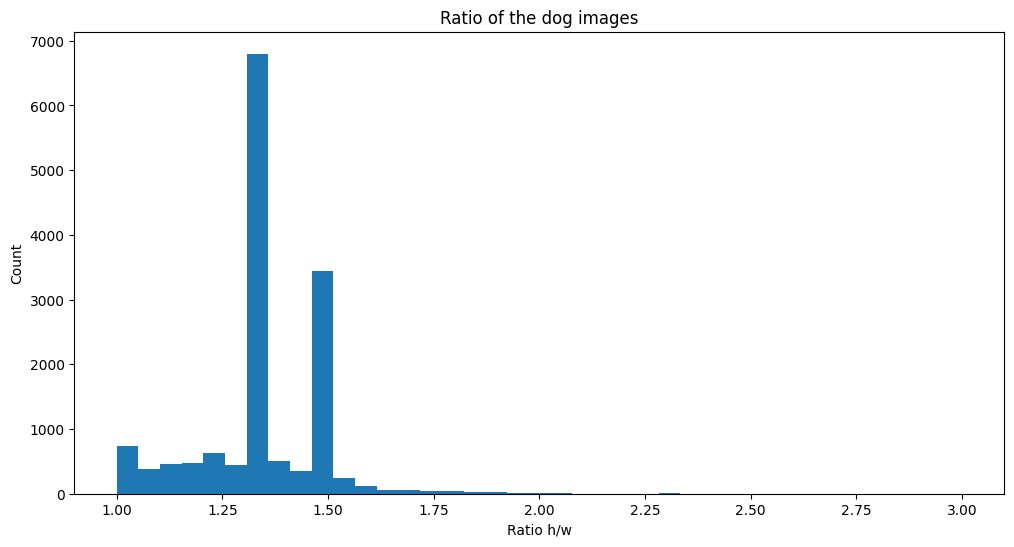

In [ ]:
# Show the ratio for the dataset

bins = np.linspace(
  math.ceil(min(list_ratio)), 
  math.floor(max(list_ratio)),
  40
)

plt.style.use(['default'])
plt.figure(figsize=(12, 6))
plt.hist(list_ratio, bins=bins)
plt.title('Ratio of the dog images')
plt.xlabel('Ratio h/w')
plt.ylabel('Count')

plt.show()

In [ ]:
# We can show the previous result thanks to a boxplot

data_Ratio = pd.DataFrame({
    "Ratio": list_ratio
})

fig = px.box(
  data_Ratio,
  y="Ratio",
  title="Ratio of the dog images",
  height=550,
  width=700
)

fig.show()

In [ ]:
# Statistical values

data_Ratio['Ratio'].describe()

count    20579.000000
mean         1.187170
std          0.297821
min          0.393574
25%          0.926000
50%          1.333333
75%          1.337209
max          3.633588
Name: Ratio, dtype: float64

In [ ]:
np.var(list_ratio)

0.08869329142346993

In [ ]:
#----------------------#

In [ ]:
list_width, list_height, list_channels = zip(*[(x[0], x[1], x[2]) for x in list_shape])

In [ ]:
# Checking if all the images use 3 channels
np.unique(list_channels)

array([3])

In [ ]:
# We don't need to delete some images

In [ ]:
from scipy import stats

In [ ]:
stats.describe(list_width)

DescribeResult(nobs=20579, minmax=(100, 2562), mean=385.86296710238594, variance=15591.57535072547, skewness=4.1245694246959745, kurtosis=43.727572051677065)

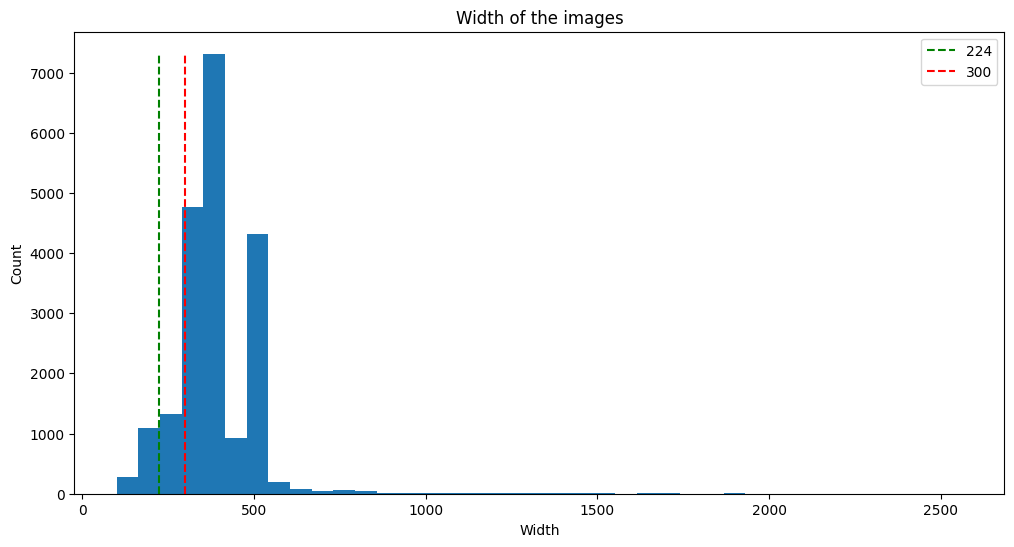

In [ ]:
# Show the width for the dataset

bins = np.linspace(
  math.ceil(min(list_width)), 
  math.floor(max(list_width)),
  40
)

plt.style.use(['default'])
plt.figure(figsize=(12, 6))
plt.hist(list_width, bins=bins)
plt.title('Width of the images')
plt.xlabel('Width')
plt.ylabel('Count')
plt.vlines(224, ymin=0, ymax=7300, colors='g', linestyles='--', label='224')
plt.vlines(300, ymin=0, ymax=7300, colors='r', linestyles='--', label='300')
plt.legend()

plt.show()

In [ ]:
stats.describe(list_height)

DescribeResult(nobs=20579, minmax=(97, 3264), mean=442.5391904368531, variance=20389.532760370912, skewness=4.590152521896193, kurtosis=59.011231009151345)

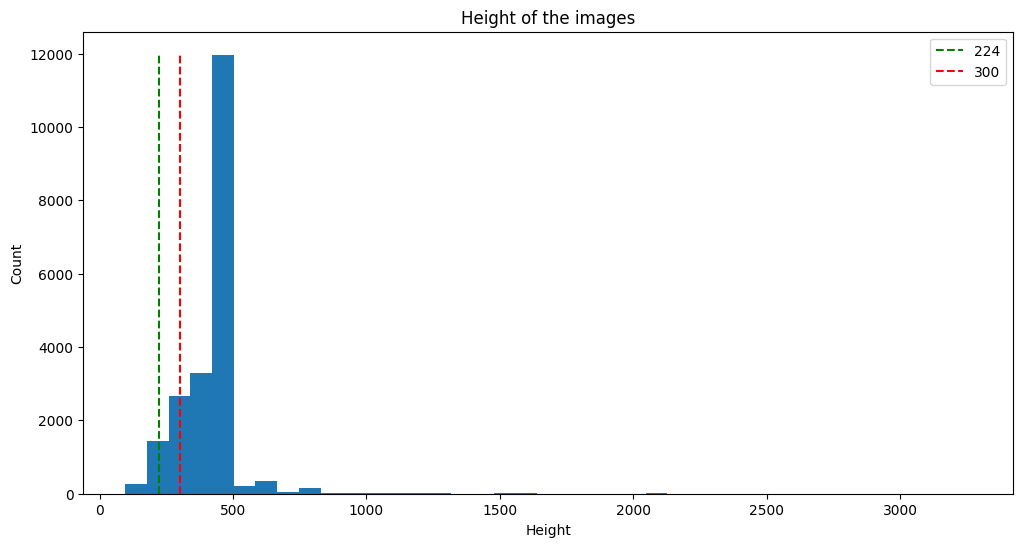

In [ ]:
# Show the height for the dataset

bins = np.linspace(
  math.ceil(min(list_height)), 
  math.floor(max(list_height)),
  40
)

plt.style.use(['default'])
plt.figure(figsize=(12, 6))
plt.hist(list_height, bins=bins)
plt.title('Height of the images')
plt.xlabel('Height')
plt.ylabel('Count')
plt.vlines(224, ymin=0, ymax=12000, colors='g', linestyles='--', label='224')
plt.vlines(300, ymin=0, ymax=12000, colors='r', linestyles='--', label='300')
plt.legend()

plt.show()

In [ ]:
result_224_pixels = []
result_300_pixels = []
for i in range(len(list_width)):
  result_224 = 0
  result_300 = 0

  if list_width[i] > 224 and list_height[i] > 224:
    result_224_pixels.append(1)
  else:
    result_224_pixels.append(0)
  
  if list_width[i] > 300 and list_height[i] > 300:
    result_300_pixels.append(1)
  else:
    result_300_pixels.append(0)

In [ ]:
print("Number of images bigger than 224x224:")
print(np.sum(result_224_pixels))
print("{:.1f} % of the whole dataset".format(100 * np.sum(result_224_pixels) / len(result_224_pixels)))

Number of images bigger than 224x224:
18987
92.3 % of the whole dataset


In [ ]:
print("Number of images bigger than 300x300:")
print(np.sum(result_300_pixels))
print("{:.1f} % of the whole dataset".format(100 * np.sum(result_300_pixels) / len(result_300_pixels)))

Number of images bigger than 300x300:
16857
81.9 % of the whole dataset


In [ ]:
#----------------------#

In [ ]:
'''
The dataset does not have a very extreme height to width ratio
(overall ratio less than 2).
Furthermore, most of the images have proportions
greater than 300 pixels (82% of the images),
and therefore 224 pixels (92% of the images).
These values are interesting because, for the algorithms
that we are going to use in transfer learning,
they are those imposed for the dimensions of the images to be processed.
Our photos are generally bigger than expected.

We will not be using "padding".
We will simply use "resizing".
However, if the results of our algorithms are disappointing,
it is possible to explore "padding" or "cropping" techniques.
'''

In [ ]:
#----------------------#
#----------------------#

In [ ]:
# Number of images per class
# Only with the train set

path = "/content/drive/MyDrive/Gaetan_Travail/ML/Formation_OC_IML/P6/Projet/Data/Images_split/train/"
list_repository = os.listdir(path)

list_dog_class = []
list_number = []

for i in range(len(list_repository)):
  onlyfiles = next(os.walk(path + list_repository[i]))[2]

  list_dog_class.append(list_repository[i])
  list_number.append(len(onlyfiles))

In [ ]:
# We can show the previous result thanks to a boxplot

data_Images_per_class = pd.DataFrame({
    "Images_per_class": list_number
})

fig = px.box(
  data_Images_per_class,
  y="Images_per_class",
  title="Boxplot of the numbers of images per class",
  height=550,
  width=700
)

fig.show()

In [ ]:
# Statistical values

data_Images_per_class['Images_per_class'].describe()

count    120.000000
mean     102.558333
std       13.907737
min       88.000000
25%       91.000000
50%       95.500000
75%      111.250000
max      151.000000
Name: Images_per_class, dtype: float64

In [ ]:
np.var(list_number)

191.81326388888886

In [ ]:
'''
The results don't show a significant imbalance within the classes.
Therefore, we decide to keep the current distribution.
'''

In [ ]:
#----------------------#
#----------------------#

In [ ]:
# Feature engineering
# Transformations thanks to the data augmentation

In [ ]:
datagen_rotation = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=90
)
datagen_width_shift  = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.5
)
datagen_height_shift  = tf.keras.preprocessing.image.ImageDataGenerator(
    height_shift_range=0.5
)
datagen_horizontal_flip  = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True
)

path = "/content/drive/MyDrive/Gaetan_Travail/ML/Formation_OC_IML/P6/Projet/Data/"

img = keras.preprocessing.image.load_img(path + "Images_split/train/German_shepherd/n02106662_590.jpg")

x = keras.preprocessing.image.img_to_array(img)
x = x.reshape((1,) + x.shape)

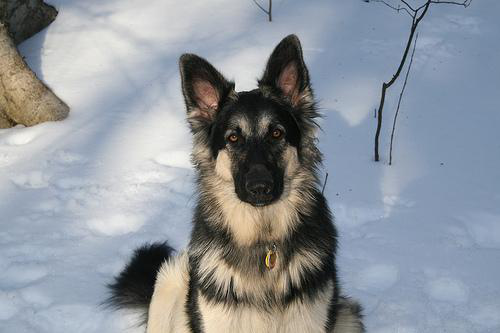

In [ ]:
# Original image
img

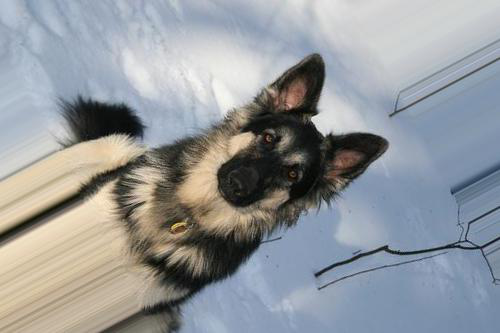

In [ ]:
# Rotation:

for batch in datagen_rotation.flow(x, batch_size=1, save_to_dir=path + 'Data_augmentation/Rotation/', save_prefix='dog_augmented', save_format='jpg'):
  break

image_transfo = next(os.walk(path + 'Data_augmentation/Rotation/'))[2]
keras.preprocessing.image.load_img(path + 'Data_augmentation/Rotation/' + image_transfo[0])

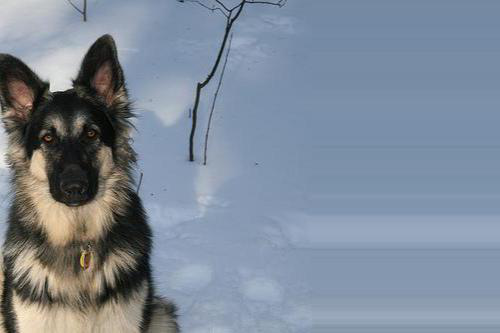

In [ ]:
# Width shift:

for batch in datagen_width_shift.flow(x, batch_size=1, save_to_dir=path + 'Data_augmentation/Width_shift/', save_prefix='dog_augmented', save_format='jpg'):
  break

image_transfo = next(os.walk(path + 'Data_augmentation/Width_shift/'))[2]
keras.preprocessing.image.load_img(path + 'Data_augmentation/Width_shift/' + image_transfo[0])

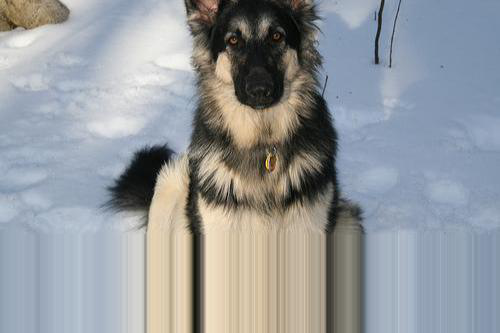

In [ ]:
# Height shift:

for batch in datagen_height_shift.flow(x, batch_size=1, save_to_dir=path + 'Data_augmentation/Height_shift/', save_prefix='dog_augmented', save_format='jpg'):
  break

image_transfo = next(os.walk(path + 'Data_augmentation/Height_shift/'))[2]
keras.preprocessing.image.load_img(path + 'Data_augmentation/Height_shift/' + image_transfo[0])

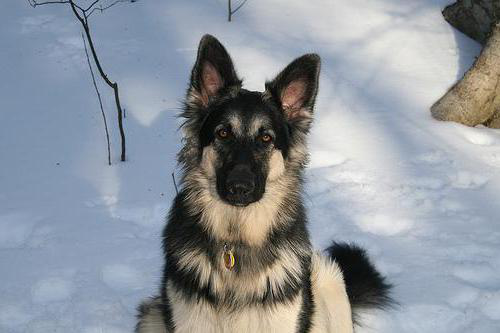

In [ ]:
# Horizontal flip:

for batch in datagen_horizontal_flip.flow(x, batch_size=1, save_to_dir=path + 'Data_augmentation/Horizontal_flip/', save_prefix='dog_augmented', save_format='jpg'):
  break

image_transfo = next(os.walk(path + 'Data_augmentation/Horizontal_flip/'))[2]
keras.preprocessing.image.load_img(path + 'Data_augmentation/Horizontal_flip/' + image_transfo[0])